# 02805 Social Graphs and Interactions 2020

## Project Assignment

**Students:**   

Anna Kristín  <br>
Eythor Ingi Júlíusson <br>
Hafdís Mist Bergsteinsdóttir<br>

**Professor:**

Sune Lehmann Jørgensen

In [1]:
# Installations for the project
!pip install wikia
!pip install networkx==2.5
!pip install fa2==0.3.5
!pip install seaborn==0.11.0
!pip install nltk==3.5
!pip install wordcloud==1.8.1
!pip install community
!pip install python-louvain


You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# Imports for the project
import wikia
import pandas as pd
import urllib.request
import math
import json
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import *
from nltk.corpus import stopwords 
from fa2 import ForceAtlas2
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import operator
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import random
import os
from community import community_louvain
import bs4
import requests
from statistics import mean 
from IPython.display import Image as Ima

sns.set_theme()

## Contributions
The assignment was done with an equal contribution by a group of three students. The group worked tightly together and
all decisions were discussed on equal grounds within the group. The tasks within the group were divided between the 
team members and their main responsibility for which part of the assignment is shown in the following table. 


In [3]:
d = {'Anna' : ["", "", "x", "", "", "", "", "x", "", "", "x", "x"], 
     'Eyþór' : ["x", "x", "", "x", "", "", "", "", "x", "", "", ""],
     'Hafdís' : ["", "", "", "", "x", "x", "x", "", "", "x", "", ""], 
     } 
  
ct = pd.DataFrame(d, index =['Data cleaning','Introduction','Creating the Network','Sentiment Analysis','Character Demographics Analysis','Random Network','Friendship Paradox', 'Network Visualization', 'Wordcloud', 'Community detection', 'Bachelors and Bachelorettes', 'Website']) 

ct

,Anna,Eyþór,Hafdís
Data cleaning,,x,
Introduction,,x,
Creating the Network,x,,
Sentiment Analysis,,x,
Character Demographics Analysis,,,x
Random Network,,,x
Friendship Paradox,,,x
Network Visualization,x,,
Wordcloud,,x,
Community detection,,,x


# Introduction to the Topic
We chose to work with data on *The Bachelor* and *The Bachelorette* contestants.
*The Bachelor* and *The Bachelorette* are American dating and relationship reality television series. 
The series revolves around a single bachelor/bachelorette who begins with a pool of romantic interests from whom he is expected to select a wife or husband. During the season, the bachelor/bachelorette eliminates candidates each week eventually culminating in a marriage proposal to the final selection.
The reason we decided to work with this data is that we thought it would be something original and had not been done before in this course. We are also fans of the show which made the assignment very fun.

In addition, we have *Bachelor Pad* and *Bachelor in Paradise* which are elimination-style reality competition television series. It is a spin-off of The Bachelor and The Bachelorette and features previous contestants who have been featured on The Bachelor or The Bachelorette. So the show may also represent "a second chance at finding love". The contestants live together in a mansion and take part in challenges to prevent elimination, go on dates with contestants of their choice, and choose other contestants to eliminate. 
In this project, we will analyse contestants from the following seasons:<br> 

**The Bachelor seasons 1, 2, 5, 9-21<br> 
The Bachelorette season 1-12<br> 
Bachelor Pad season 1-3<br> 
Bachelor in Paradise season 1-6<br> **


The data about each contestant is compiled from Wikipedia, Bachelor Nation Wiki (Fandom/Wikia), and Github and Kaggle data sets. We were fortunate enough to come across a dataset on Github that was a csv-formatted table containing information about the age, hometown, elimination week etc. of each contestant from these series. We used this dataset to create the nodes (contestants) and add attributes to them. This dataset was derived from the contestant's Bachelor Nation Wiki pages but set up in a good way for this project.

The reason why not all seasons were available is that there isn't information about them all on the Wiki.

We will create an undirected network containing each contestant as a node, with connections (edges) representing that the characters were together on one of the franchise's series. We will use this network to investigate the characteristics, most common words, degree distribution, and many other things for different groups in the network.

The goal for the end user's experience is to provide an understanding of how network analysis can be used to discover inter-relationship by simple figures and charts.

## Data Cleaning and Preprocessing
We had two datasets on a csv format (both with data for the Bachelorette and the Bachelor contestants) 
before we started. The reason we wanted to use both was that one of them contained more information on how the contestants did on the show but the other one contained more information on the demographics of the contestants
(age, hometown, profession,..)

https://github.com/fivethirtyeight/data/blob/master/bachelorette/bachelorette.csv

https://www.kaggle.com/brianbgonz/the-bachelorette-contestants?select=bachelor-contestants.csv

The one from Kaggle contained an ID column containing the season nr, the first name, and the first letter of the last name of the contestant.
We created a column in the Github dataset in the same format in order to merge the two datasets using VLOOKUP in Excel.
To create these ID's we ran into some problems where the resulting ID in the Github dataset didn't always correspond to an ID in the
Kaggle dataset. With some manual work and disregarding a couple of contestants, we managed to merge them into one single dataset.
This is the dataset we used to create the nodes and add attributes to them.

When we started to retrieve the wiki pages of the contestants there was often a discrepancy in the names of the contestants
on the wiki pages and in our dataset (some had their nicknames listed, some had changed their last name, etc.) so we had to change some of them in our dataset to be able to retrieve wiki pages for most of the contestants. However, there
were still some pages that we couldn't access but we just skipped analysing those.

The data we used consisted of about 700 contestants and 10.000 connections.

## Network Science Tools
* Networkx to create, operate on and visualize the network.
    * Nodes to represent characters, edges to represent connections between characters and attributes to represent characteristics of the contestants.
* Labmt to calculate the sentiment of the wiki pages.
* Degrees to find out which characters are the most "popular".
* ER random network to compare our network to a "typical" random network.
* The Friendship Paradox to check it applies to our network.
* TF-IDF to find which words were unique to specific groups.
* WordClouds to visualize the most descriptive words of a group.
* The concept of Communities to split our network into smaller communities.

In [4]:
# Read in the data on the contestants using read_csv
bachelor_csv = pd.read_csv('bachelor_New.csv', sep=',', encoding="ISO-8859-1")
bachelorette_csv = pd.read_csv('bachelorette-new.csv', sep=',', encoding="ISO-8859-1")

In [5]:
# Check if everything came out right
bachelor_csv.head()

,ID,Name,Age,Occupation,Hometown,ElimWeek,Season,Season Text,BIP,BP,...,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10,MAIN_CHAR
0,01_Amanda_M,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",0.0,1.0,1.0,NaN,NaN,...,D5,D1,D1,D1,D1,0,0,0,0,NaN
1,01_Trista_R,Trista Rehn,29.0,Dancer,"Miami, Florida",6.0,1.0,1.0,NaN,NaN,...,D5,D1,D1,D1,D1,0,0,0,0,1.0
2,01_Shannon_O,Shannon Oliver,24.0,Consultant,"Dallas, Texas",5.0,1.0,1.0,NaN,NaN,...,D5,D1,D1,D1,0,0,0,0,0,NaN
3,01_Kim_X,Kim,24.0,Nanny,"Tempe, Arizona",4.0,1.0,1.0,NaN,NaN,...,D5,D4,D1,0,0,0,0,0,0,NaN
4,01_Cathy_G,Cathy Grimes,22.0,Student,"Terra Haute, Indiana",3.0,1.0,1.0,NaN,NaN,...,D5,D4,0,0,0,0,0,0,0,NaN


In [6]:
bachelorette_csv.head()

,ID,Name,Age,Occupation,Hometown,ElimWeek,Season,Season Text,BIP,BP,...,DATES_2,DATES_3,DATES_4,DATES_5,DATES_6,DATES_7,DATES_8,DATES_9,DATES_10,MAIN_CHAR
0,01_RYAN_S,Ryan Sutter,29.0,Firefighter,"Vail, Colorado",0.0,1.0,1.0,A_1,NaN,...,D14,D1,D1,D1,D1,NaN,NaN,NaN,NaN,NaN
1,01_CHARLIE_M,Charlie Maher,28.0,Financial Analyst,"Hermosa Beach, California",6.0,1.0,1.0,NaN,NaN,...,D14,D1,D1,D1,D1,NaN,NaN,NaN,NaN,NaN
2,01_RUSS_X,Russ,30.0,Writer,"San Rafael, California",5.0,1.0,1.0,NaN,NaN,...,D14,D1,D1,D1,NaN,NaN,NaN,NaN,NaN,NaN
3,01_GREG_T,Greg T.,28.0,Importer,"Manhattan, New York",4.0,1.0,1.0,NaN,NaN,...,D14,D5,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01_BOB_G,Bob Guiney,31.0,Mortgage Broker,"Ferndale, Michigan",3.0,1.0,1.0,NaN,NaN,...,D14,D5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


## Creating The Network

### The Network
We will go through the dataset and create nodes for each contestant and add different attributes.

### Attributes
All attributes are casted to a String format in order to make the attribute operations/comparisons cohesive.
* **name**: Full name of contestant
* **season**: Bachelor/Bachelorette season 
* **BP**: Bachelor Pad season ('nan' if did not appear on any BP season)
* **BIP**: Bachelor in Paradise season ('nan' if did not appear on any BiP season)
* **age**: Age of contestant
* **profession**: The contestant's occupation
* **homestate**: What state the contestant is from
* **fip_rose (boolean)**: Did the contestant receive the First Impression Rose
* **elim_week**: In what week the contestant was sent home ('0.0' if winner)
* **main_char**: Season that the contestant was the bachelor/bachelorette ('nan' if never)

In [7]:
# Start by initiating an empty directed NetworkX graph
b_graph = nx.Graph()

# Add nodes (female contestants) from the Bachelor seasons
b_graph.add_nodes_from(bachelor_csv.loc[:,'ID'], gender='female')

# Add nodes (male contestants) from the Bachelorette seasons
b_graph.add_nodes_from(bachelorette_csv.loc[:,'ID'], gender='male')

# Iter through both datasets and add the attributes to each node in our graph
for row in bachelor_csv.itertuples(index=True, name='ID'):
    b_graph.add_node(row.ID, 
    name=str(row.Name), 
    season=str(row.Season), 
    BP=str(row.BP).split(", "), 
    BIP=str(row.BIP).split(", "),
    age=str(row.Age),
    profession=str(row.Occupation),
    homestate=(str(row.Hometown).split(", ")[0] if (len(str(row.Hometown).split(", ")) == 1) else str(row.Hometown).split(", ")[1]),
    fip_rose=(str(row.ELIMINATION_1) == 'R1'),
    elim_week=str(row.ElimWeek),
    main_char=(str(row.MAIN_CHAR)))

for row in bachelorette_csv.itertuples(index=True, name='ID'):
    b_graph.add_node(row.ID, 
    name=str(row.Name), 
    season=str(row.Season), 
    BP=str(row.BP).split(", "), 
    BIP=str(row.BIP).split(", "),
    age=str(row.Age),
    profession=str(row.Occupation),
    homestate=(str(row.Hometown).split(", ")[0] if (len(str(row.Hometown).split(", ")) == 1) else str(row.Hometown).split(", ")[1]),
    fip_rose=(str(row.ELIMINATION_1) == 'R1'),
    elim_week=str(row.ElimWeek),
    main_char=(str(row.MAIN_CHAR)))

# Remove nan nodes - if any
nodes_to_remove = []
for node in b_graph:
    if type(node) != str:
        nodes_to_remove.append(node)

for node in nodes_to_remove:
    b_graph.remove_node(node)

In [8]:
# Iter through all nodes in our graph
for node in b_graph.nodes():

    # A list to store all of the contestants that we want to connect with current node
    characters_to_link = []
    
    # Iter through all bachelor contestants and see if there is a connection
    for row in bachelor_csv.itertuples(index=True, name='ID'):
        if(pd.notnull(row.ID)):
            babe_id = row.ID
            if(babe_id != node):
                # Were they on the same bachelorette season?
                if(b_graph.nodes[babe_id]['gender'] == b_graph.nodes[node]['gender'] and b_graph.nodes[babe_id]['season'] == b_graph.nodes[node]['season']):
                    characters_to_link.append(row.ID)
                    # Were they in the same BP season?
                for season in b_graph.nodes[node]['BP']:
                    if(season in b_graph.nodes[babe_id]['BP'] and 'nan' not in b_graph.nodes[babe_id]['BP']):
                        characters_to_link.append(row.ID)
                # Were they in the same BIP season?
                for season in b_graph.nodes[node]['BIP']:
                    if(season in b_graph.nodes[babe_id]['BIP'] and 'nan' not in b_graph.nodes[babe_id]['BIP']): 
                        characters_to_link.append(row.ID)
                else:
                    # Was babe_id the bachelor/bachelorette in the season that node participated in?
                    if(b_graph.nodes[babe_id]['gender'] != b_graph.nodes[node]['gender'] and b_graph.nodes[babe_id]['main_char'] == b_graph.nodes[node]['season']): 
                        characters_to_link.append(row.ID)

    # Iter through all bachelorette contestants and see if there is a connection
    for row in bachelorette_csv.itertuples(index=True, name='ID'):
        if(pd.notnull(row.ID)):
            babe_id = row.ID
            if(babe_id != node):
                # Were they on the same bachelorette season?
                if(b_graph.nodes[babe_id]['gender'] == b_graph.nodes[node]['gender'] and b_graph.nodes[babe_id]['season'] == b_graph.nodes[node]['season']):
                    characters_to_link.append(row.ID)
                    # Were they in the same BP season?
                for season in b_graph.nodes[node]['BP']:
                    if(season in b_graph.nodes[babe_id]['BP'] and 'nan' not in b_graph.nodes[babe_id]['BP']):
                        characters_to_link.append(row.ID)
                # Were they in the same BIP season?
                for season in b_graph.nodes[node]['BIP']:
                    if(season in b_graph.nodes[babe_id]['BIP'] and 'nan' not in b_graph.nodes[babe_id]['BIP']): 
                        characters_to_link.append(row.ID)
                else:
                    # Was babe_id the bachelor/bachelorette in the season that node participated in?
                    if(b_graph.nodes[babe_id]['gender'] != b_graph.nodes[node]['gender'] and b_graph.nodes[babe_id]['main_char'] == b_graph.nodes[node]['season']): 
                        characters_to_link.append(row.ID)

    # Add an edge between current node and all the nodes we found a connection with
    for y in characters_to_link :
        b_graph.add_edge(node, y)

In [9]:
# Check the size of our graph
print("Number of nodes (contestants) is: ", len(b_graph.nodes))

Number of nodes (contestants) is:  686


In [10]:
# Check the number of connections in our graph
print("Number of edges (connections) is: ", len(b_graph.edges))

Number of edges (connections) is:  10346


In [11]:
btw_seasons_edges = 0
for u,v in b_graph.edges :
    season1 = b_graph.nodes[u]['season']
    season2 = b_graph.nodes[v]['season']
    gender1 = b_graph.nodes[u]['gender']
    gender2 = b_graph.nodes[u]['gender']

    # Check if the link is between members of different bachelor/bachelorette seasons
    if((season1 != season2 or gender1 != gender2) 
    and b_graph.nodes[u]['main_char'] != season2 
    and b_graph.nodes[v]['main_char'] != season1): 
        btw_seasons_edges += 1

# Number of links between bachelor/bachelorette seasons
print("Number of edges (connections) that are not created because of the same Bachelor/Bachelorette season: ", btw_seasons_edges)

Number of edges (connections) that are not created because of the same Bachelor/Bachelorette season:  1402


## Sentiment Analysis

Sentiment Analysis is a method to analyze text and decide if it is positive or negative. As we did in the course,
the *labmt.txt* file is used to evaluate each word and then calculate the average score for each text. 

We retrieve the wiki texts for each character and calculate the average sentiment value of each contestant's wiki text.
The Python library **Wikia** is used. By doing so, we can easily access the text from the contestants Wikia page (the wiki pages are available at the wiki hosting service 
*Fandom* which is formerly known as *Wikia* ).




In [12]:
# Calculate sentiment values

# Read labmt.txt file and create a dictionary with the words (field 0) as keys and the happiness average (field 2) as value
labmt_dict = {}
with open("labmt.txt") as file:
    for line in file:
        fields = line.split("\t")
        labmt_dict[fields[0]] = fields[2]



# A function that calculates the average sentiment of a list of words (tokens)
def tokens_sentiment(tokens_list):
    sent = 0
    count = 0
    for word in tokens_list:
        # Check if word is in the labmt list - if not don't take into account when calculating average
        if(word in labmt_dict):
            sent += float(labmt_dict.get(word))
            count += 1
      
    return sent/count

In [13]:
# Create a dict for the texts
text_dict = {}

# List of names where no text was found
unavailable_names_f = []
unavailable_names_m = []

# Punctuations we don't want to be included in the words
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''

# Retrieve all stopwords in english
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

for node in b_graph.nodes:
    try:
        # Retrieve text from wikia
        text = wikia.summary("Bachelor", b_graph.nodes[node]['name'])
        # Split text into seperate strings
        text = text.split()
        # Remove all stopwords/non-words and put to lowercase
        tokens = [word.lower() for word in text if word.isalpha() and word not in stop_words]
        words_to_remove = []
        # Remove punctuations
        for word in tokens:
            for ele in word:  
                if ele in punc:  
                    word = word.replace(ele, "") 
        # Calculate sentiment value and store as attribute on node in our network
        b_graph.nodes[node]['sentiment'] = tokens_sentiment(tokens)
        # Store list of tokens in text_dict
        text_dict[node] = tokens
        
    # Store information on which wiki pages were unaccessible
    except BaseException as exp:
        if(b_graph.nodes[node]['gender'] == 'female'):
            unavailable_names_f.append(b_graph.nodes[node]['name'])
        else:
            unavailable_names_m.append(b_graph.nodes[node]['name'])

print('Number of female contestants with unavailable wiki pages: ', len(unavailable_names_f))
print('Number of female contestants with unavailable wiki pages: ', len(unavailable_names_m))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Number of female contestants with unavailable wiki pages:  69
Number of female contestants with unavailable wiki pages:  67


There are couple of reasons for the high number of wiki pages that we did not manage to get.
In some cases, the surnames are missing in the data but what is more common is a divergence from the standard.
Despite that, a big part of the contestants nodes now have the sentiment value as an attribute. 

Further analysis and results will be presented later in the report when we look at the communities.


## Character Demographics Analysis

We are interested in the connection between the characters.
We are going to look at the most connected characters in our graph and 
analyse their characteristics. To do that we are going to use the degree distribution
and simple commands and loops. 

In [14]:
# Find 20 most connected characters
most_connected = sorted(b_graph.degree, key=lambda x: x[1], reverse=True)[:20]

print('20 most connected characters')
print('----------------------------')
for node in most_connected:
    print(node)

20 most connected characters
----------------------------
('08_CHRIS_B', 93)
('17_Sarah_H', 77)
('19_Carly_W', 76)
('11_JARED_H', 74)
('18_Clare_C', 71)
('05_JAKE_P', 68)
('15_Michelle_M', 67)
('06_KIRK_D', 67)
('04_GRAHAM_B', 65)
('21_Jaimi_K', 64)
('05_JESSE_K', 64)
('07_NICK_P', 64)
('14_Tenley_M', 62)
('08_KALON_M', 62)
('16_Jaclyn_S', 61)
('12_VINCENT_V', 61)
('12_DANIEL_M', 61)
('20_Amanda_S', 60)
('20_Emily_F', 60)
('14_Michelle_K', 59)


Let's look at the professions of the most connected characters and see if there is a pattern.

In [15]:
# Look at the professions of the most connected characters
most_conn_dict = {}

print('Professions of the 20 most connected contestants overall')
print('--------------------------------------------------------')
for node in most_connected:
    print(b_graph.nodes[node[0]]['name'], 'profession: ' , b_graph.nodes[node[0]]['profession'])
    most_conn_dict[b_graph.nodes[node[0]]['name']] = b_graph.nodes[node[0]]['profession']



Professions of the 20 most connected contestants overall
--------------------------------------------------------
Chris Bukowski profession:  Sales
Sarah Herron profession:  Advertising
Carly Waddell profession:  Singer
Jared Haibon profession:  Restaurant Manager
Clare Crawley profession:  Hairstylist
Jake Pavelka profession:  Commercial Pilot
Michelle Money profession:  Hair stylist
Kirk DeWindt profession:  Sales
Graham Bunn profession:  Athlete
Jaimi King profession:  Chef
Jesse Kovacs profession:  Wine Maker
Nick Peterson profession:  Personal Trainer
Tenley Molzahn profession:  College Admissions
Kalon McMahon profession:  Consultant
Jaclyn Swartz profession:  Advertising
Vincent "Vinny" Ventiera profession:  Barber
Daniel Maguire profession:  Model
Amanda Stanton profession:  Esthetician
Emily Ferguson profession:  Waitress
Michelle Kujawa profession:  Office Manager


In [16]:
from collections import Counter 
# Count the values
profession_count = dict(sorted(dict(Counter([j for i,j in most_conn_dict.items()])).items(), key=lambda item: item[1], reverse=True))
professions_keys = list(profession_count)[:5]
professions_val = list(profession_count.values())[:5]

print("Top 5 professions:")
print("-------------------")
for i in range(5):
    print(professions_keys[i], professions_val[i])

Top 5 professions:
-------------------
Sales 2
Advertising 2
Singer 1
Restaurant Manager 1
Hairstylist 1


It doesn't look like there's a lot of connection between the professions of the overall top 20 most connected characters. Let's try to look at the genders seperately.

In [17]:
# Find 50 most connected male characters
most_conn_m_dict = {}
most_connected_m = sorted([x[0] for x in b_graph.nodes.data() if x[1]['gender'] == 'male'],
                      key=(lambda x : b_graph.degree[x]), reverse=True)[:50]

print('Professions of the 50 most connected male contestants')
print('-----------------------------------------------------')
for node in most_connected_m:
    print(b_graph.nodes[node]['name'], ':' , b_graph.nodes[node]['profession'])
    most_conn_m_dict[b_graph.nodes[node]['name']] = b_graph.nodes[node]['profession']

Professions of the 50 most connected male contestants
-----------------------------------------------------
Chris Bukowski : Sales
Jared Haibon : Restaurant Manager
Jake Pavelka : Commercial Pilot
Kirk DeWindt : Sales
Graham Bunn : Athlete
Jesse Kovacs : Wine Maker
Nick Peterson : Personal Trainer
Kalon McMahon : Consultant
Vincent "Vinny" Ventiera : Barber
Daniel Maguire : Model
Michael Stagliano : Break Dance Instructor
Chris Soules : Farmer
Nick Viall : Sales
Brandon Andreen : Painting Contractor
Ryan Beckett : Realtor
Ben Higgins : Sales
Juan Pablo Galavis : Athlete
Sean Lowe : Insurance Agent
Josh Murray : Athlete
Nick Viall : Sales
Brett Melnick : Hairstylist
Carl King : Firefighter
Ryan Sutter : Firefighter
Michael Garofola : Federal Prosecutor
Mikey Tenerelli : Plumbing Contractor
Dan Cox : Sales
Ben Flajnik : Wine Maker
Wells Adams : Radio DJ
Evan Bass : Erectile Dysfunction Specialist
Grant Kemp : Firefighter
Chad Johnson : Luxury Real Estate Agent
Christian Bishop : Consulta

In [18]:
# Count the values
male_profession_count = dict(sorted(dict(Counter([j for i,j in most_conn_m_dict.items()])).items(), key=lambda item: item[1], reverse=True))
male_professions = list(male_profession_count)[:5]
male_val = list(male_profession_count.values())[:5]

print("Top 5 professions:")
print("-------------------")
for i in range(5):
    print(male_professions[i], male_val[i])

Top 5 professions:
-------------------
Sales 7
Athlete 3
Firefighter 3
Wine Maker 2
Personal Trainer 2


We can see that most of the men are in fields related to sports or work in sales. It could be that men in these fields tend to participate in more than just their single Bachelor/Bachelorette seasons.

Let's look at the professions of the most connected female contestants.

In [19]:
# Find 50 most connected female characters
most_conn_f_dict = {}
most_connected_f = sorted([x[0] for x in b_graph.nodes.data() if x[1]['gender'] == 'female'],
                      key=(lambda x : b_graph.degree[x]), reverse=True)[:50]

# Look at the professions of the 50 most connected female characters
print('Professions of the 50 most connected female conetstants')
print('-------------------------------------------------------')
for node in most_connected_f:
    print(b_graph.nodes[node]['name'], ':' , b_graph.nodes[node]['profession'])
    most_conn_f_dict[b_graph.nodes[node]['name']] = b_graph.nodes[node]['profession']

Professions of the 50 most connected female conetstants
-------------------------------------------------------
Sarah Herron : Advertising
Carly Waddell : Singer
Clare Crawley : Hairstylist
Michelle Money : Hair stylist
Jaimi King : Chef
Tenley Molzahn : College Admissions
Jaclyn Swartz : Advertising
Amanda Stanton : Esthetician
Emily Ferguson : Waitress
Michelle Kujawa : Office Manager
Cassandra Ferguson : Dancer
Erica Rose : Socialite
Kaitlyn Bristowe : Dance Instructor
Jillian Harris : Designer
Emily Maynard : Children's Hospital Event Planner
Ashley Hebert : Student
Joelle "JoJo" Fletcher : Real Estate Developer
Andi Dorfman : Assistant
Chelsie Webster : Science Educator
Desiree Hartsock : Bridal Stylist
Ali Fedotowsky : Advertising
Jennifer Saviano : Business Owner
Haley Ferguson : Waitress
Gia Allemand : Model
Jubilee Sharpe : War Veteran
Shushanna Mkrtychyan : Mathematician
Deanna Pappas : Realtor
AshLee Frazier : Personal Organizer
Daniella McBride : Commercial Casting Associat

In [20]:
# Count the values
female_profession_count = dict(sorted(dict(Counter([j for i,j in most_conn_f_dict.items()])).items(), key=lambda item: item[1], reverse=True))
female_professions = list(female_profession_count)[:5]
female_val = list(female_profession_count.values())[:5]

print("Top 5 professions:")
print("-------------------")
for i in range(5):
    print(female_professions[i], female_val[i])

Top 5 professions:
-------------------
Advertising 3
Designer 3
Esthetician 2
Waitress 2
Assistant 2


It doesn't look like there's as big pattern with the women's professions. No single profession appears significantly more often than another.

Let's find out if the age plays a part if the characters participates in more than one season.

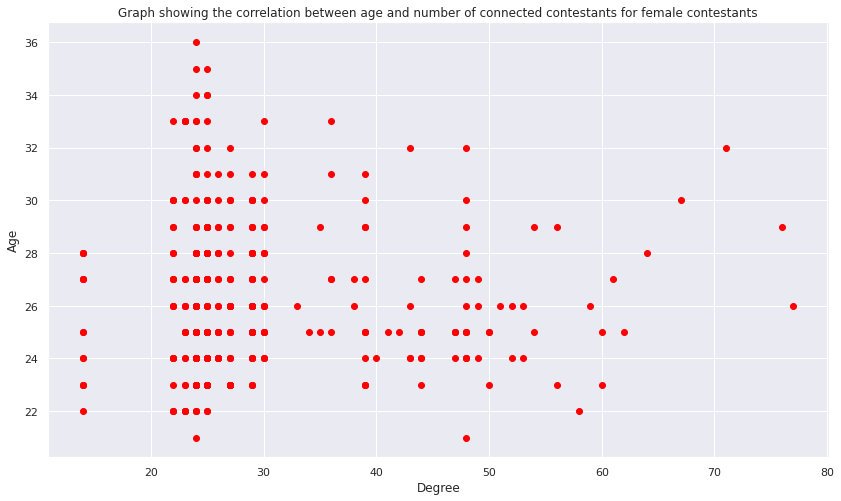

In [21]:
degrees_f=[]
age_f=[]
degrees_m=[]
age_m=[]

# Gather data on the degree and age of each of the nodes in our graph
for node in b_graph.nodes:
    if(b_graph.nodes[node]['gender'] == 'female'):
        degrees_f.append(b_graph.degree(node))
        age_f.append(float(b_graph.nodes[node]['age']))
    else:
        degrees_m.append(b_graph.degree(node))
        age_m.append(float(b_graph.nodes[node]['age']))

plt.figure(figsize=(14,8))
plt.xlabel('Degree')
plt.ylabel('Age')
plt.title("Graph showing the correlation between age and number of connected contestants for female contestants")
plt.plot(degrees_f, age_f, 'o', color='red')
plt.show()

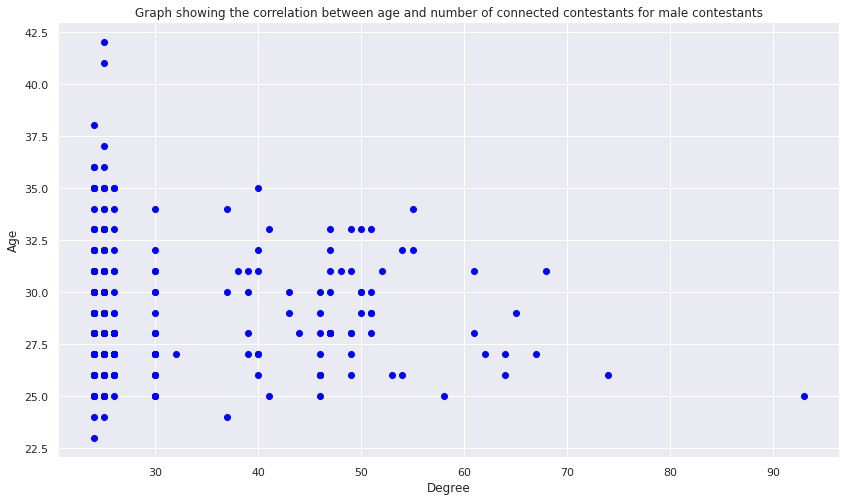

In [22]:
plt.figure(figsize=(14,8))
plt.xlabel('Degree')
plt.ylabel('Age')
plt.title("Graph showing the correlation between age and number of connected contestants for male contestants")
plt.plot(degrees_m, age_m, 'o', color='blue')
plt.show()

We can see from these graphs that the majority of the contestants just have around 20-30 connections. For the females it looks like there isn't really a pattern between their age and how many shows they appear on. For the males, however, you can see a pattern of the younger contestants having more connections than the older ones.

Lets look at the traits of the winners of each series and try to see if there's a pattern between age or profession and who wins the series.

In [23]:
# Retrieve all female and male winners
winners_f = []
winners_m = []

for node in b_graph:
    if(b_graph.nodes[node]['elim_week'] == '0.0'):
        if(b_graph.nodes[node]['gender'] == 'female'):
            winners_f.append(node)
        else:
            winners_m.append(node)

In [24]:
print("Female winners")
print("--------------")
for node in winners_f:
    print('age: ', b_graph.nodes[node]['age'], ' | profession: ', b_graph.nodes[node]['profession'])

print('')
print("Male winners")
print("--------------")
for node in winners_m:
    print('age: ', b_graph.nodes[node]['age'], ' | profession: ', b_graph.nodes[node]['profession'])

Female winners
--------------
age:  23.0  | profession:  Event Planner
age:  27.0  | profession:  School Psychologist
age:  22.0  | profession:  Student
age:  24.0  | profession:  Teacher
age:  26.0  | profession:  Social Worker
age:  22.0  | profession:  Actress
age:  25.0  | profession:  Sales
age:  23.0  | profession:  Marketing Representative
age:  25.0  | profession:  Children's Hospital Event Planner
age:  28.0  | profession:  Model
age:  26.0  | profession:  Designer
age:  26.0  | profession:  Nurse
age:  29.0  | profession:  Nurse
age:  29.0  | profession:  Teacher

Male winners
--------------
age:  29.0  | profession:  Firefighter
age:  29.0  | profession:  Sales
age:  26.0  | profession:  Professional snowboarder
age:  29.0  | profession:  Consultant
age:  26.0  | profession:  Insurance Agent
age:  34.0  | profession:  Construction Manager
age:  27.0  | profession:  Entrepreneur
age:  27.0  | profession:  Mortgage Broker
age:  29.0  | profession:  Athlete
age:  28.0  | profes

We can see that most of the female winners are in some kind of caretaker job (nurse, teacher, social worker, school psychologist) so it could be that males tend to draw towards women that are good caretakers.

For the males the pattern is not as clear but we can still see a lot of athletic and finance jobs - similar to when we were looking at the most connected characters.

Lets explore further the age of the winners.

In [25]:
# find average age of all female and male contestants
age_f = []
age_m = []

for node in b_graph.nodes:
    if(b_graph.nodes[node]['age'] != 'nan'):
        if(b_graph.nodes[node]['gender'] == 'female'):
            age_f.append(float(b_graph.nodes[node]['age']))
        else:
            age_m.append(float(b_graph.nodes[node]['age']))

# find average age of female and male winners
winners_age_f = []
winners_age_m = []

for node in winners_f:
    if(b_graph.nodes[node]['age'] != 'nan'):
        winners_age_f.append(float(b_graph.nodes[node]['age']))
for node in winners_m:
    if(b_graph.nodes[node]['age'] != 'nan'):
        winners_age_m.append(float(b_graph.nodes[node]['age']))

In [26]:
print('Average age of all female contestants: ', round((sum(age_f)/len(age_f)),3))
print('Average age of all male contestants: ', round((sum(age_m)/len(age_m)),3))

print('Average age of female winners: ', round((sum(winners_age_f)/len(winners_age_f)),3))
print('Average age of male winners: ', round((sum(winners_age_m)/len(winners_age_m)),3))

Average age of all female contestants:  26.296
Average age of all male contestants:  29.096
Average age of female winners:  25.357
Average age of male winners:  28.273


We can see that the winners are, on average, around one year younger than the average contestant.

In the show there is always a cocktail night on the first night. At the end of the night the bachelor/bachelorette gives out a "first impression rose" to the person that 
had the best first impression to him/her. 
Lets look at how often the person that gets this first impression rose actually wins.

In [27]:
fip_winner = 0
for node in b_graph.nodes:
    if(b_graph.nodes[node]['fip_rose'] and (node in winners_f or node in winners_m)):
        fip_winner += 1

print(fip_winner/(len(winners_f)+len(winners_m)))

0.24


We can see that 24% of the winners recieved the first impression rose even though the odds of receiving the first impression rose are around 1/30. We can conclude that recieving the first impression rose increases significantly the odds of winning.

In each season of the Bachelorette, the producers of the show make at least one contestant as "the villain". Even though "the villain" is not an official title that the contestant gets, it is quite obvious for the viewer who it is supposed to be. We want to check if some of the contestants with the lowest sentiment values were "the villain"

In [28]:
sentiment_dict = {}
test = []
for node in b_graph:
    try:
        sent_value = b_graph.nodes[node]["sentiment"]
        sentiment_dict[node] = sent_value
    except BaseException as exp:
        test.append(node)
    

In [29]:
sent_dict = {k: v for k, v in sorted(sentiment_dict.items(), key=lambda item: item[1])} 

count = 0

# Print out the contestants with the top 10 saddest pages
for node in sent_dict.keys():
    if(count > 10):
        break
    print(b_graph.nodes[node]['name'], ' : ', round(sent_dict[node],4))
    count += 1

Michael Nance  :  4.6027
Rob Dahm  :  4.6567
Eric Hill  :  4.7287
Michael Burns  :  4.7571
Chad Johnson  :  4.8022
Valishia Savage  :  4.815
Hunter Wagner  :  4.9
Cathy Grimes  :  4.9178
Andy Chang  :  4.9533
Anselm Clinard  :  4.964
Cory Higgins  :  4.964


If we start by looking at a part of the page for Michael Nance who has the lowest sentiment score, it is obvious why the score is so low:

     He died on May 29, 2017. The official cause of his death was multiple drug toxicity, according to the Travis County Office of the Medical Examiner. His death was ruled as accidental.


Another example is Chad Johnson, who was "the villain" in season 12 of the Bachelorette:

     On February 24, 2020, he was arrested for robbery with domestic violence enhancement. His bail was set at $100,000, according to public records. He has been released from jail on bond. He is due back in court on March 17. On February 29, 2020

## Random Network

Now we are interested to see if our network has the same properties as the random network. To find out, we do a comparison for the degree distribution of our 
b network (with bachelor/bachelorette contestant) to a random network with the same number of nodes and same probability p.
We will use the simplest random network model, the Erdös-Rényi (ER random network), 
where all edges are independent. To create this network we have to find the
parameters that are necessary from our graph.

In [30]:
Nr_nodes = len(b_graph.nodes)
Degrees = b_graph.degree()
Degrees_value = dict(Degrees).values()
Avg_degree = sum(Degrees_value)/len(Degrees_value)
print("Average degree for our network is: ", round((Avg_degree),3))

Average degree for our network is:  30.163


In [31]:
max_degree = max(Degrees_value)
min_degree = min(Degrees_value)
print('Maximum degree of our network:',max_degree)
print('Minimum degree of our network:',min_degree)

Maximum degree of our network: 93
Minimum degree of our network: 14


**Probability p**

Now it is possible to find the probability that a node in the network is connected to other nodes in the network.

$${{k = p\times(N-1) => p = (\frac{k}{N-1})}}$$

Where<br> 
k: Average degree <br>
N: Number of nodes

In [32]:
p = Avg_degree/(Nr_nodes-1)
print("Calculated p for our network is: ", round((p),3))


Calculated p for our network is:  0.044


In [33]:
# Apply the tool to create random graph
G_ER = nx.erdos_renyi_graph(Nr_nodes,p)
avg_deg = np.array(list(G_ER.degree))[:,1].mean()

print('Average degree for random network is:', round((avg_deg),3))

Average degree for random network is: 30.464


In [34]:
max_degree_ER = np.array(list(G_ER.degree))[:,1].max()
min_degree_ER = np.array(list(G_ER.degree))[:,1].min()
print('Maximum degree of the random network :',max_degree_ER)
print('Minimum degree of the random network :',min_degree_ER)

Maximum degree of the random network : 45
Minimum degree of the random network : 15


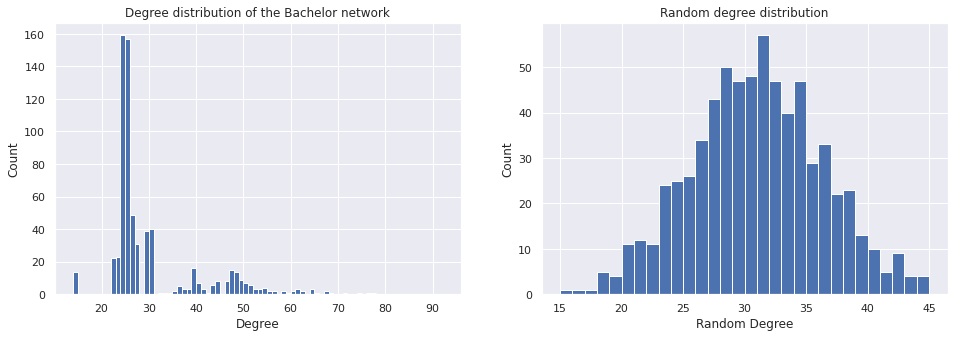

In [35]:
# subgraphs
fig=plt.figure(figsize=(16, 5))

ax1=fig.add_subplot(121)
bins_vector = np.arange(min_degree, max_degree +1)
degree_sequence = [d for n, d in b_graph.degree()]

# histogram count how many nodes have each degree
counts, bins = np.histogram(degree_sequence, bins = bins_vector)

# plt.figure(figsize=(14,8))
plt.hist(degree_sequence, bins[:-1],counts) 
plt.title("Degree distribution of the Bachelor network")
plt.xlabel('Degree')
plt.ylabel('Count')

ax2=fig.add_subplot(122)
bins_vector_random = np.arange(min_degree_ER, max_degree_ER +1)

#    plt.figure(figsize=(14,8))
counts_random, bins_random = np.histogram(np.array(list(G_ER.degree))[:,1], bins = bins_vector_random)
plt.hist(bins_random[:-1], bins_random, weights=counts_random)
plt.title("Random degree distribution")
plt.xlabel('Random Degree')
plt.ylabel('Count')
plt.show()

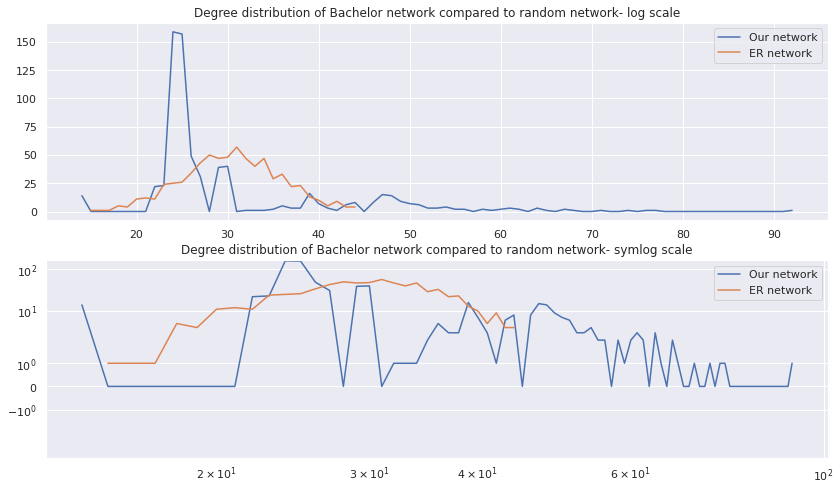

In [36]:
bins_vector_ER = np.arange(min_degree_ER, max_degree_ER +1)

counts_ER, bins_ER = np.histogram(np.array(list(G_ER.degree))[:,1], bins = bins_vector_ER)
f,ax = plt.subplots(2,1,figsize=(14,8))

ax[0].plot(bins[:-1],counts)
ax[0].plot(bins_vector_ER[:-1],counts_ER)
ax[0].legend(['Our network','ER network'])

ax[0].title.set_text('Degree distribution of Bachelor network compared to random network- log scale')
ax[1].title.set_text('Degree distribution of Bachelor network compared to random network- symlog scale')

ax[1].plot(bins[:-1],counts)
ax[1].plot(bins_vector_ER[:-1],counts_ER)
ax[1].legend(['Our network','ER network'])
ax[1].set_xscale('log')
ax[1].set_yscale('symlog')

By comparing the random network to the our b network, it can be seen that the b network has larger degree than the random network but 
the average degree for both networks are almost the same. It is also clear from these graphs that the random network is more stable and more normally distributed.
Also, the range for our b network is much larger than for the random network. 

## Friendship paradox

The friendship paradox was one of the learning criteria in the course. The paradox states that almost everyone has fewer friends than their friends have, on average. 

We are interested in this theory because we thought that we could possibly disprove it, because in most series, on average, only 1-2 competitors have been in more than one serie. 
We thought there were fewer big hubs and more nodes that had only a few connections. 
Let's check if this is the fact.

To test the friendship paradox, we choose a random node and compare its degree to the average degree of its neighbors, and then repeat this for a subset of nodes.

In [37]:
# Start by choosing a node at random
i = random.choice(list(b_graph.nodes()))
# Get degree of the random node
randomnode = b_graph.degree[i]
print("The random node is: ", i, " and has a degree of: ", randomnode)

The random node is:  05_JOHN_H  and has a degree of:  30


In [38]:
# Now finds i's neighbors and calculate the average degree
b_neighbors = b_graph.neighbors(i)
# Make a list with all of i's neighbor's degrees
degrees = dict(b_graph.degree(b_neighbors)).values()
# Calculate average degree of i's neighbors
Avg_degree= sum(degrees)/len(degrees)
print("The Average degree of ", i, "'s neighbors is:", Avg_degree)

The Average degree of  05_JOHN_H 's neighbors is: 36.333333333333336


Now compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.

In [39]:
# Do i's friends, on average, have more friends than i?
print("It is", Avg_degree > randomnode, "that ", i, "'s friends on average have more friends than", i)

It is True that  05_JOHN_H 's friends on average have more friends than 05_JOHN_H


Lets do this 1000 times to see how many times the friendship paradox is true.

In [40]:
true = 0
# How often does i's friend have more friends than i?
for i in range(1000):
    # Choose random node and find degree
    i = random.choice(list(b_graph.nodes()))
    i_degree = b_graph.degree[i]
    # Find random node's neighbors and calculate their average degree
    neighbors = b_graph.neighbors(i)
    degrees = dict(b_graph.degree(neighbors)).values()
    neighbors_avg_degree = sum(degrees)/len(degrees)
    # Check if random node's degree is lower than the average of his neighbors
    if(i_degree < neighbors_avg_degree):
        true = true+1

print("The result is that it is true in ", true, " out of a 1000 tries")

The result is that it is true in  707  out of a 1000 tries


So it is clear, the friendship parabox is not going to be disproved with our network. 

That means that almost everyone is friends with someone in a hub, which increases the average degree of the friends. 
Its a result of having a power-law degree distribution.

## Network Visualization

We are big fans of the show and interesting in visualizing our network
to see how the nodes connect and that contestant will form a hub.

To do that we are going to use nx.draw_kamada_kawai that is an algorithm for Drawing General Undirected Graphs. We are also 
going to use the Force Atlas algorithm to visualize.  

Nodes colors are according to the series that the contestants were in:<br>
**Green**: For the contestants in Bachelor Pad or Bachelor in Paradise.<br>
**Red**: For the contestants only in Bachelorette.<br>
**Blue**: For the contestants only in Bachelor.<br>
The scale node-size is according to the degree. 



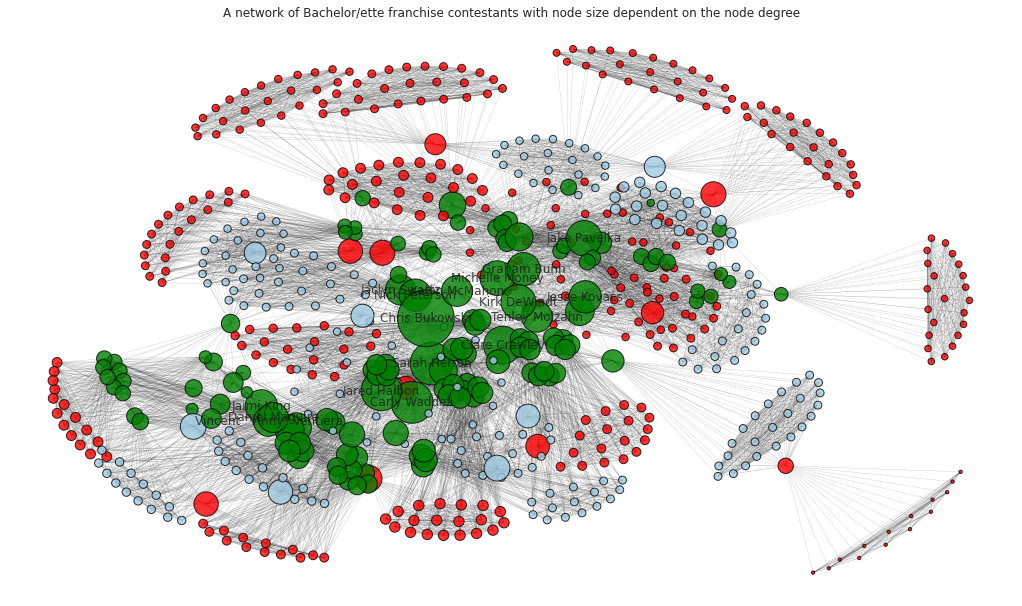

In [41]:
# Generate colors for undirected network drawing
# Green = BP or BiP participants
# Red = females (not in any BP or BiP season)
# Blue = males (not in any BP or BiP season)
color_map = []
for ID in b_graph.nodes():
    if('nan' not in b_graph.nodes[ID]['BP'] or 'nan' not in b_graph.nodes[ID]['BIP']): # Was in Bachelor Pad or Bachelor in Paradise
        color_map.append('#008000') # Green
    elif (b_graph.nodes[ID]['gender'] == "female"): # Was in Bachelor
        color_map.append('#ff0000') # Red
    else: # Was in Bachelorette
        color_map.append('#A0CBE2') # Blue


# Find nodes with degree over 60 and show their names in the drawing
labels = {
    node: (b_graph.nodes[node]['name']
        if b_graph.degree(node) > 60
        else '')
    for node in b_graph.nodes
}

# Node size depends on node degree
d = dict(b_graph.degree)

plt.figure(figsize=(14,8))
nx.draw_kamada_kawai(b_graph, 
                    node_size=[(v*v*v)/250 for v in d.values()], #TODO Not much variety in node degree so we use ??? to get clear hub nodes
                    node_color = color_map,
                    alpha=0.8,
                    width=0.1,
                    with_labels=True, 
                    labels=labels)

ax = plt.gca()
ax.collections[0].set_edgecolor("black") 
plt.title("A network of Bachelor/ette franchise contestants with node size dependent on the node degree")
plt.show()

* We can definitely see that the seasons group together but it is interesting to see that some hubs appear.
* There is one season in the lower right corner where the nodes are much smaller - this is because in the first season of the bachelor there were much fewer contestants than in the later ones.
* The hubs on the outer part of the network are the contestants from the first seasons of the Bachelor/Bachelorette because then we didn't have Bachelor Pad or Bachelor in Paradise so there are no connections between series except between the next chosen Bachelor/Bachelorette and the contestants on their season.
* Green nodes are bigger because those contestants have made connections outside of their bachelor/bachelorette seasons inside BP or BIP.
* The biggest nodes are people that took part in one or more BP/BIP season or were chosen to be the bachelor/bachelorette in a subsequent season.
* The hub of green nodes in the middle is a group of people that appeared regularly on the BP or BIP seasons and therefore made connections with many people outside of their bachelor/bachelorette seasons.
* We have more red nodes in the graph because there have been made more bachelor seasons than bachelorette so we have more female contestants than male ones.

Now let's visualize it using the Force Atlas algorithm.

100%|██████████| 2000/2000 [00:15<00:00, 130.49it/s]
BarnesHut Approximation  took  4.11  seconds
Repulsion forces  took  9.16  seconds
Gravitational forces  took  0.10  seconds
Attraction forces  took  0.59  seconds
AdjustSpeedAndApplyForces step  took  0.55  seconds


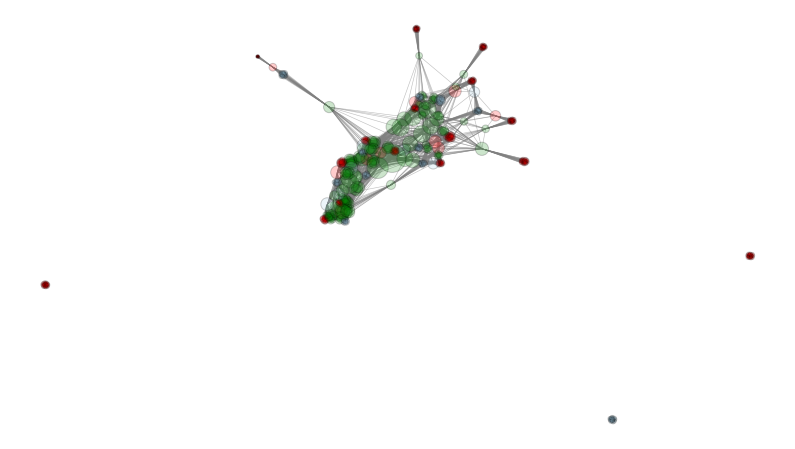

In [42]:
# reference https://github.com/bhargavchippada/forceatlas2
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=0.2,  # Tolerance was 1.0
                        barnesHutOptimize=True,
                        barnesHutTheta=0.6, # was 1.2
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,    # could change to 2
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

# Node size should depend on the node degree
degree = dict(b_graph.degree)

# node-coordinates from the force atlas algorithm
positions = forceatlas2.forceatlas2_networkx_layout(b_graph, pos=None, iterations=2000)


plt.figure(figsize=(14,8))

# Visualize the network using the Networkx draw function
nx.draw_networkx_nodes(b_graph, positions, nodelist = degree.keys(), node_size= [v*v*v/1000 for v in degree.values()],node_color=color_map,alpha=0.2)
nx.draw_networkx_edges(b_graph, positions, width=0.6, edge_color='grey',alpha=0.5) # edge_color='grey',alpha=0.5

ax = plt.gca()
ax.collections[0].set_edgecolor("black")
plt.axis('off')
plt.title("")
plt.show()

This visualization does not look as good as the previous one. The series group so much together so a lot of them appear as a single node.

## Wordcloud
It is interesting to see what words are the most common words used in the characters's wiki pages.
The tool that will be used is text dict to add the text fields to a dictionary and than we will set up an 
frequency distribution for each word to count how many times each word appears.

In this part, we will analyze the texts by creating wordclouds. 
First, all the texts are combined and than the WordCloud library is used to visualize the most common words. 
Obviously we make the wordclouds in the shape of a rose.


In [43]:
wiki_tokens = []

# Create a common list containing all characters that we don't have wiki texts for
unavailable_names = unavailable_names_m +unavailable_names_f

# Retrieve all the words in all wiki pages and add to one list
for node in b_graph.nodes:
    if b_graph.nodes[node]['name'] not in unavailable_names:
        wiki_tokens += text_dict[node]

In [44]:
# Set up frequency distribution
fdist = nltk.FreqDist(wiki_tokens)
fdist

FreqDist({'season': 753, 'the': 636, 'week': 591, 'she': 573, 'eliminated': 573, 'contestant': 555, 'he': 375, 'bachelor': 186, 'returned': 114, 'they': 75, ...})

In [45]:
# Function to plot a wordcloud
def show_wordcloud(text,title, color_code):
    plt.figure(figsize=(14,8))
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    #print(d)
    rose_mask = np.array(Image.open(path.join(d, "rose7.jfif")))
    fig_wc = WordCloud(width = 512, height = 512, background_color='white', mask=rose_mask, collocations = False, contour_color='Black', contour_width=0.0, colormap=color_code).generate(text)
#    fig_wc = WordCloud(width = 512, height = 512, background_color='white', collocations = False, contour_color='Black', contour_width=0.0).generate(text)
    plt.imshow(fig_wc, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()

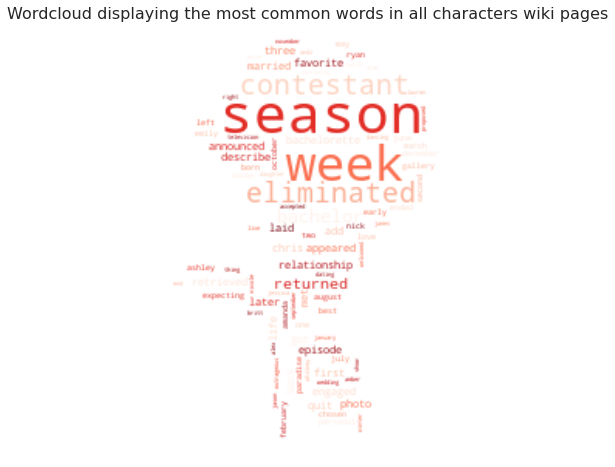

In [46]:
wiki_string = ""
for word in fdist:
    wiki_string += (word + " ")*round(fdist[word])
    

show_wordcloud(wiki_string,"Wordcloud displaying the most common words in all characters wiki pages", "Reds")

We can see that the most common words are season, week, eliminated and contestant which makes sense since the wiki pages always talk about what season the contestant was on and in what week he/she was elminated. 

Then we also have a lot of "relationship" words like engaged, expecting, married, love etc. which makes sense for a dating show. 

Lets now investigate whether there's a difference in the words used for the male and female wiki pages.

In [47]:
wiki_tokens_f = []
wiki_tokens_m = []

# Retrieve all the words in female wiki pages and add to one list
for node in b_graph.nodes:
    if b_graph.nodes[node]['name'] not in unavailable_names and b_graph.nodes[node]['gender'] == 'female': 
        wiki_tokens_f += text_dict[node]
    elif b_graph.nodes[node]['name'] not in unavailable_names and b_graph.nodes[node]['gender'] == 'male':
        wiki_tokens_m += text_dict[node]

In [48]:
# Set up frequency distribution for each gender
fdist_f = nltk.FreqDist(wiki_tokens_f)
fdist_m = nltk.FreqDist(wiki_tokens_m)

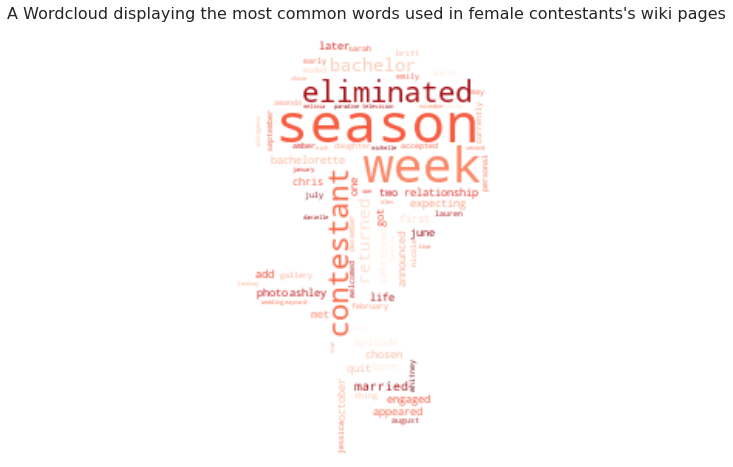

In [49]:
# Female wordcloud
wiki_string_f = ""
for word in fdist_f:
    wiki_string_f += (word + " ")*round(fdist_f[word])
    
# Generate word cloud
show_wordcloud(wiki_string_f,"A Wordcloud displaying the most common words used in female contestants's wiki pages", "Reds")

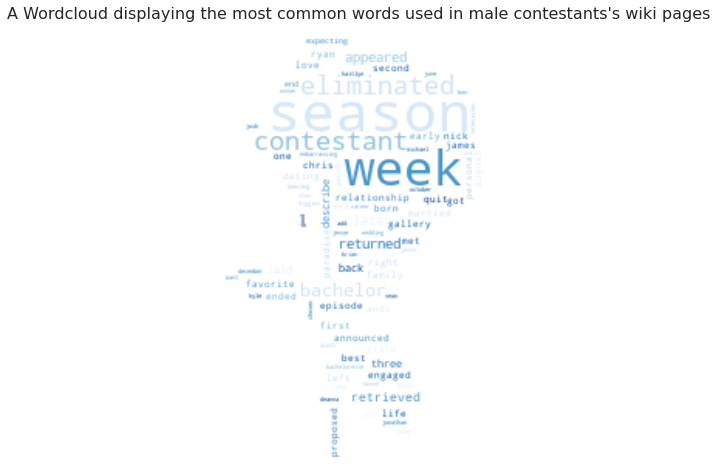

In [50]:
# Male wordcloud
wiki_string_m = ""
for word in fdist_m:
    wiki_string_m += (word + " ")*round(fdist_m[word])
    
# Generate word cloud
show_wordcloud(wiki_string_m,"A Wordcloud displaying the most common words used in male contestants's wiki pages", "Blues")

We can't really see a difference in these wordclouds. To see what words are unique to the female contestants and what words are unique to the male contestants we'll use a strategy called TF-IDF.

### TF-IDF for the genders
To calculate the TF we can use the freq.dist from above.

To calculate the IDF we will use the inverse document frequency smooth which prevents division by zero (if the word doesn't appear in the other gender's texts).

We ended up using a log normalization weighting sceme for the TF value when calculating the final TF-IDF in order to decrease the impact of super common words like 'season', 'contestant' etc.

In [51]:
# Function to calculate the IDF smooth for a word
def idf_weight(N, nt):
    return math.log(N/(nt+1))+1

tf_dist_f = {}
# For each word in the female freqdist..
for word in fdist_f.keys():
    word_count = 0
    # ..check if it appears in the male's freqdist
    if fdist_m[word]:
        word_count += 1
    # ..calculate the IDF smooth for the word - multiply it by the log weighted TF and store in a dist
    tf_dist_f[word] = idf_weight(10, word_count)*math.log(1+fdist_f[word])
    
tf_dist_m = {}
# For each word in the male freqdist..
for word in fdist_m.keys():
    word_count = 0
    # ..check if it appears in the female's freqdist
    if fdist_f[word]:
        word_count += 1
    # ..calculate the IDF smooth for the word - multiply it by the log weighted TF and store in a dist
    tf_dist_m[word] = idf_weight(10, word_count)*math.log(1+fdist_m[word])

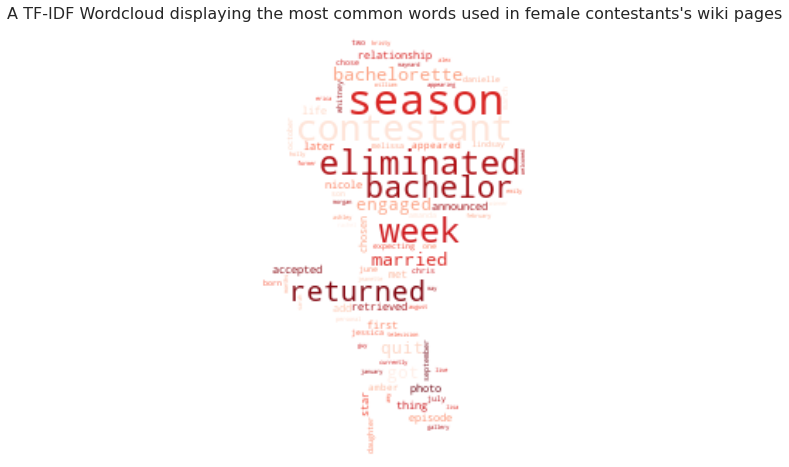

In [52]:
string = ""
#for key in tf_idf_f:
for key in tf_dist_f:
    # Add each word [TF-IDF[word]] times to our string
    #string += (key + " ")*round(tf_idf_f[key])
    string += (key + " ")*round(tf_dist_f[key])

show_wordcloud(string, "A TF-IDF Wordcloud displaying the most common words used in female contestants's wiki pages", "Reds")


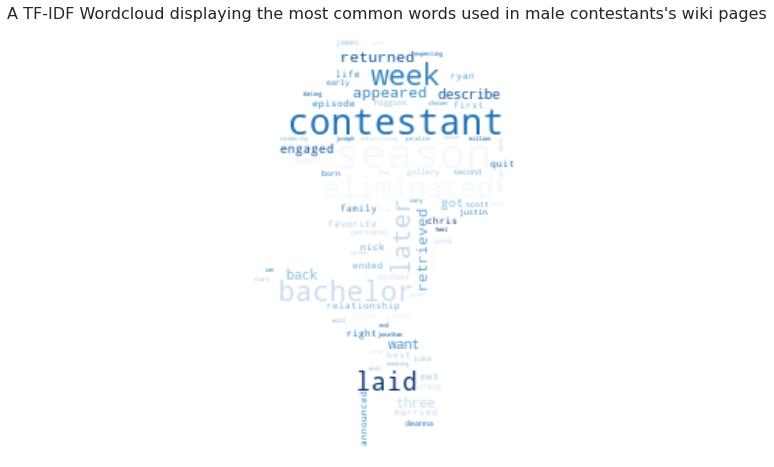

In [53]:
string = ""
#for key in tf_idf_m:
for key in tf_dist_m:
    # Add each word [TF-IDF[word]] times to our string
    #string += (key + " ")*round(tf_idf_m[key])
    string += (key + " ")*round(tf_dist_m[key])

   # plt.figure(figsize=(14,8))
   # d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
   # rose_mask = np.array(Image.open(path.join(d, "rose7.jfif")))
   # fig_wc = WordCloud(width = 512, height = 512, background_color='white', mask=rose_mask, collocations = False, contour_color='Black', contour_width=0.0, colormap="Blues").generate(string)
#    fig_wc = WordCloud(width = 512, height = 512, background_color='white', collocations = False, contour_color='Black', contour_width=0.0).generate(text)
   # plt.imshow(fig_wc, interpolation='bilinear')
   # plt.title("A TF-IDF Wordcloud displaying the most common words used in male contestants's wiki pages", fontsize=16)
   # plt.axis("off")


show_wordcloud(string, "A TF-IDF Wordcloud displaying the most common words used in male contestants's wiki pages", "Blues")

The words are still quite similar - besides the names of the contestants which are female in the first one and male in the second one.

The reason why we probably can't get a good TF-IDF value is because we only have two "communities" so it's hard to see which words are unique to it's community when we only have one other to compare it to.

We will later in this notebook use TF-IDF to identify unique words for each community to try and see if that gives more clear results.

## Community detection

The modularity of a network measures how strongly the network can be divided into groups, i.e. it measures how well a network 
can be divided into groups based on a certain attribute of the network.

We are interesting in modularity of our network to see if it can be split easily into groups and form a community.
Will these communities represent the series? Or are some other communities that will appear.

We will use the Python Louvain-algorithm that is explained here below.

In [54]:
Gcc = sorted(nx.connected_components(b_graph), key=len, reverse=True)
# Gcc[0] is the greatest connected component
graph_undirected = b_graph.subgraph(Gcc[0])

The Python Louvain-algorithm is implemented to find communities in the network.

In [55]:
# Find communities within the subgraph using community_louvain
partition = community_louvain.best_partition(graph_undirected)
modularity = community_louvain.modularity(partition,graph_undirected)
print("Modularity of the network is ", modularity)

Modularity of the network is  0.7799474207984506


The louvain method starts by finding small communities by optimizing each node's modularity locally. This is done by starting with one node, calculating the modularity change that 
would occur if he were to connect with each of his neighbors and connecting with the one with the highest change. This is then repeated for all nodes until it will end up with a bunch 
of small communities. Each of these small communities is then treated like a node and the modularity optimization is repeated. 
This is done until there is no increase in modularity by grouping together smaller communities and we have our final communities.


The modularity can be in the range $[-1,1]$ and higher modularity implies better partition and the better is the corresponding community structure.
So it is clear that the Bachelor/Bachelorette network can be split into groups. Next thing is to see if these communities represent the series that
the contestant belongs to or if there are some other communities that they split into. 

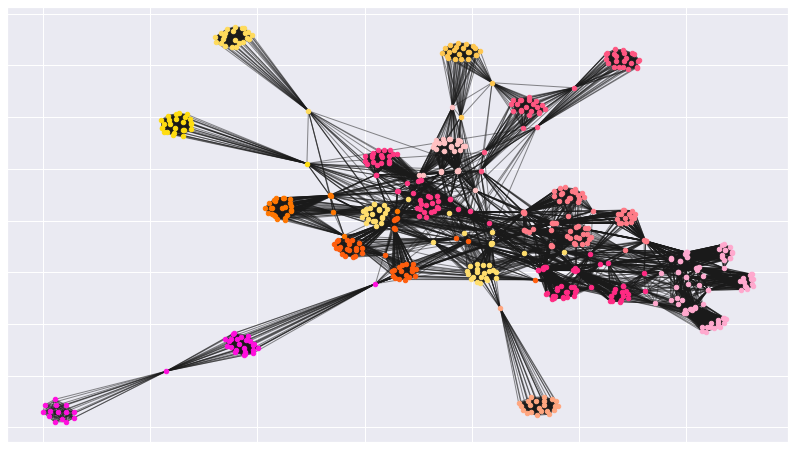

The network is split into  14 communities


In [56]:
# Drawing the communities
size = float(len(set(partition.values())))
pos = nx.spring_layout(graph_undirected)
count = 0.

# List to store all the communities as NetworkX graphs
communities = []
l = len(graph_undirected.edges)

# Function to get a random color
def random_color():
    rgbl=[255,0,0]
    random.shuffle(rgbl)
    return tuple(rgbl)

plt.figure(figsize=(14,8))
# Create a list
for com in set(partition.values()) :
    count = count + 1.
    # find nodes in community
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    # drawing the communities
    nx.draw_networkx_nodes(graph_undirected, pos, list_nodes, node_size = 20, node_color = '#{:06x}'.format(random.randint(0xff0000, 0xffff00)))
    # create subgraph containing nodes
    graph = nx.subgraph(graph_undirected, [x for x in list_nodes])
    # add subgraph to the list of communities
    communities.append(graph)
    

nx.draw_networkx_edges(graph_undirected,pos, alpha=0.5)
plt.show()

print("The network is split into ", len(set(partition.values())) ,"communities")

There were 37 series in total used to build the network so the communities do not depend entirely on what series the contestants were in. Let's see how many nodes are in each community by plotting the distribution of community sizes.

Text(0, 0.5, 'Count')

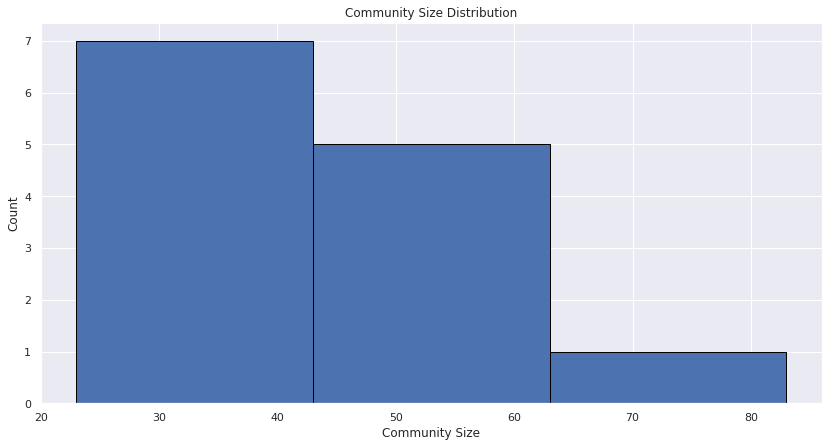

In [57]:
sizes = []
for community in communities:
    sizes.append(len(community.nodes))

bins_vector = np.arange(min(sizes), max(sizes)+1, 20)

plt.figure(figsize=(14,7))
plt.hist(sizes, bins=bins_vector, edgecolor='black')
plt.title('Community Size Distribution')
plt.xlabel('Community Size')
plt.ylabel('Count')

From this, it is possible to see that most of the communities have around 22-42 nodes and then are a few large with 62-82 nodes.
The reason is that most of the contestants were only in one series, The Bachelor or The Bachelorette. Then there is some of 
the contestants that also went to Bachelor Pad or Bachelor in Paradise and are therefore in the middle of the graph, 
with community size around 42-62. There are also few contestants that have been more than once in the Bachelor Pad or 
Bachelor in Paradise determined to find love, but it can be assumed that it has not gone well enough...

Let's inspect the top 10 communities, to get a better idea of which words are unique to it's community.

In [58]:
# Find 10 largest communities (graphs) and store it in a list
top_ten = sorted(communities, key=lambda e: len(e.nodes), reverse=True)[:10]

In [59]:
wiki_community = []

for community in top_ten:
    t = [] # Variable to store our string for the community
    # Retrieve all the words in all wiki pages and add to one list
    for node in community:
        if b_graph.nodes[node]['name'] not in unavailable_names:
            t += text_dict[node]

    wiki_community.append(t)

In [60]:
# Set up frequency distribution (TF) for each community
fdists = []
for tokens_words in wiki_community:
    fdists.append(nltk.FreqDist(tokens_words))

### TF-IDF in each community


We'll use TF-IDF to see if there are unique words to each community.
To calculate the TF, freqdist is set up for each community containing the frequency of all words in the community's texts.
To calculate the IDF, the inverse document frequency smooth which prevents division by zero (if the word appears in no other documents).

Than log normalization is used as weighting sceme for the TF value when calculating the final TF-IDF in order to decrease the impact of super popular words that - 
even with the IDF weighing - appeared so often that they overtook the wordclouds. 


In [61]:
# Calculate IDF smooth for every word in every list
tf_top_ten = []
for dist in fdists:
    tf_dist = {}
    # For each word in the community's freqdist..
    for word in dist.keys():
        word_count = 0
        # ..check in how many of the other community's freqdists it appears
        for dist2 in fdists:
            if dist != dist2:
                if dist2[word]:
                    word_count += 1
        # Calculate the IDF smooth for the word - multiply it by the log weighted TF and store in a dist
        tf_dist[word] = idf_weight(10, word_count)*math.log(1+dist[word])
    # Append the dist containing the TF-IDF value for each word in the community to our tf_marvel_ten list
    tf_top_ten.append(tf_dist)

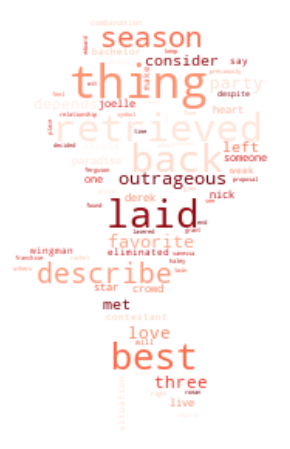

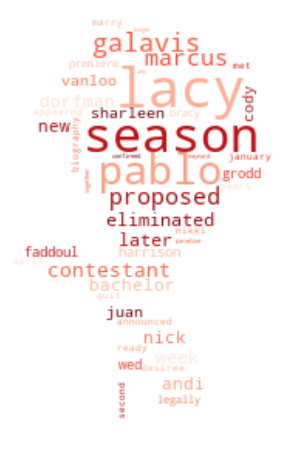

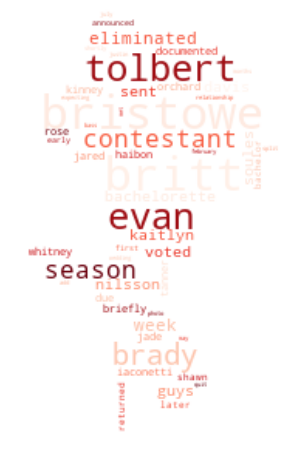

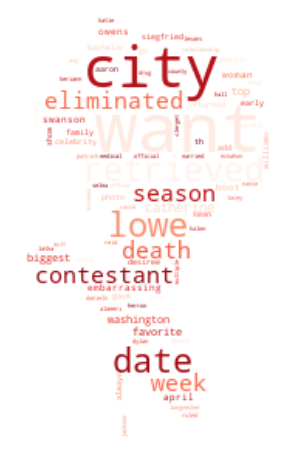

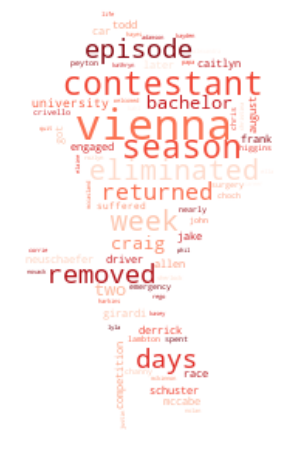

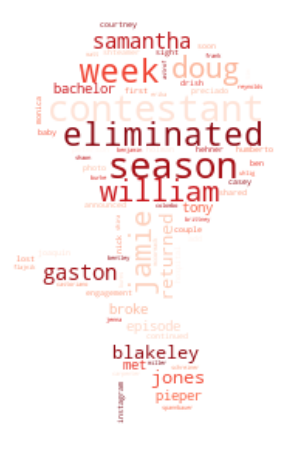

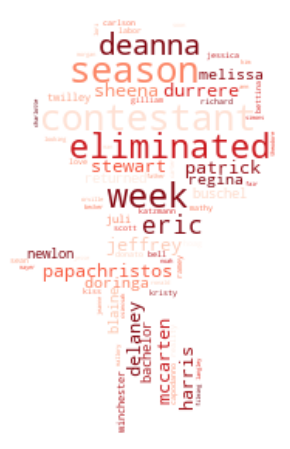

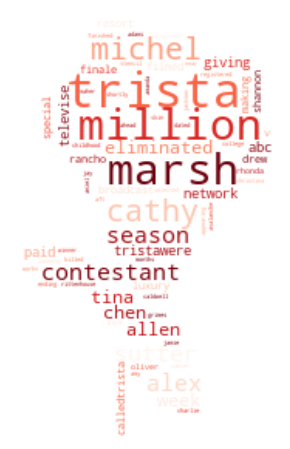

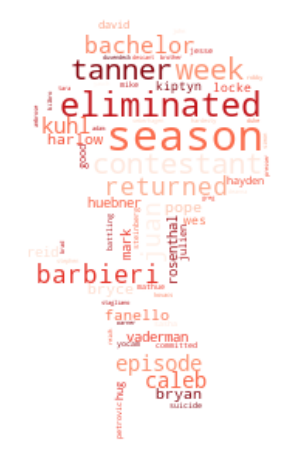

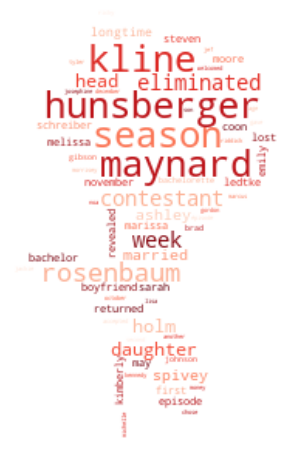

In [62]:
# Make WordClouds containing the top 50 words with the highest TF-IDF values in each community
for dist in tf_top_ten:
    string = ""
    for key in dist:
        # Add each word [TF-IDF[word]] times to our string
        string += (key + " ")*round(dist[key])
    
    show_wordcloud(string,"", "Reds")

The conclusion from the wordclouds is that there seem to be much of the same words used in each seasons.  
You can however see which characters are the most dominant ones in each community since some characters are mentioned more often than others.

In [63]:
from statistics import mean 
sentiment_community = []
for community in top_ten:
    s = [] # Variable to store our string for the community
    # Retrieve all the sentiment values and add to one list
    for node in community:
        if b_graph.nodes[node]['name'] not in unavailable_names:
            s.append(b_graph.nodes[node]['sentiment'])
    sentiment_community.append(s)

# Now we find the average sentiment values for each community
avg_sentiment_community = []
print('Communities sentiments')
print('--------------------------------')
for i in range(10):
    avg_sentiment_community.append(mean(sentiment_community[i]))
    print("Average sentiment for community ", i+1, "is", round((avg_sentiment_community[i]),3))

Communities sentiments
--------------------------------
Average sentiment for community  1 is 5.517
Average sentiment for community  2 is 5.207
Average sentiment for community  3 is 5.301
Average sentiment for community  4 is 5.309
Average sentiment for community  5 is 5.167
Average sentiment for community  6 is 5.168
Average sentiment for community  7 is 5.138
Average sentiment for community  8 is 5.327
Average sentiment for community  9 is 5.081
Average sentiment for community  10 is 5.353


In [64]:
print("Avergae sentiment for all communities is: ", round((mean(avg_sentiment_community)),3))

Avergae sentiment for all communities is:  5.257


We can see that the average sentiment value is very similar for each community. 

Like mentioned before, some words appear more often in some of the wordclouds for example *lazy* in community 2 and that is a word that is rather negative and the sentiment value is below average for that community. Same for community 9, that have the biggest *eliminated* word in the wordcloud and is with lowest sentiment value.
The community with the highest average sentiment value is community 1 with the positive big word: *best*.

Let's plot the average degree for each community. 

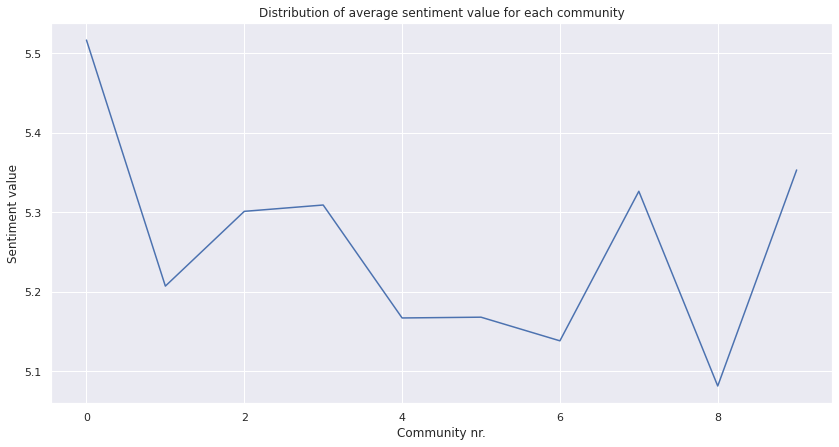

In [65]:
y = avg_sentiment_community
x = np.arange(len(y))

plt.figure(figsize=(14,7))
plt.title("Distribution of average sentiment value for each community")
plt.xlabel("Community nr.")
plt.ylabel('Sentiment value')
# Lets make a scatter plot of the average sentiment value for each community
plt.plot(y)
plt.yscale('linear')
plt.grid(True)
plt.show()

High sentiment values signify a more common use of positive words. It is possible to see from the graph above that most of the communities 
have average sentimental values around the mean (around 5.3). The conclusion is that all communities have rather positive reviews and there is no community that is completely positive or negative.

## Bachelors and Bachelorettes
The last thing we will do is to focus on the contestants that have been the Bachelor or the Bachelorette.
In this part, the goal is not to present new ideas or theories but instead we will see if the results 
match with our intuition as huge fans of the show.

Since we are looking at the winners, we will now use the Wikipedia API instead of Wikia to access texts. It is not common 
that the contestants have a detailed Wikipedia page but most of the winners have one. 


We'll start by finding which contestants in our network have been the Bachelor or Bachelorette.

In [66]:
main_chars = []

# Find contestants that have been main characters of a season
for node in b_graph.nodes:
    if(b_graph.nodes[node]['main_char'] != 'nan'):
        main_chars.append(node)

main_chars

['01_Trista_R',
 '11_Deanna_P',
 '13_Jillian_H',
 '14_Ali_F',
 '15_Emily_M',
 '15_Ashley_H',
 '17_Desiree_H',
 '18_Clare_C',
 '18_Andi_D',
 '19_Kaitlyn_B',
 '20_Joelle_F',
 '01_BOB_G',
 '04_JASON_M',
 '05_JAKE_P',
 '07_BEN_F',
 '08_ARIE_J',
 '08_SEAN_L',
 '09_JUAN_G',
 '10_CHRIS_S',
 '11_NICK_V',
 '11_BEN_H']

Now we're going to retrieve the intro text from their Wikipedia pages.

In [67]:
wikipedia_texts = {}
no_wiki_chars = []
for node in main_chars:
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    # Find wikilink for each character
    # Some names didn't work as links so we manually set those
    if(node == '01_Trista_R'):
        title = "titles=" + urllib.parse.quote('Trista Sutter'.replace(" ", "_"))
    elif(node == '11_Deanna_P'):
        title = "titles=" + urllib.parse.quote('DeAnna Pappas'.replace(" ", "_"))
    elif(node == '20_Joelle_F'):
        title = "titles=" + urllib.parse.quote('JoJo Fletcher'.replace(" ", "_"))
    else:
        title = "titles=" + urllib.parse.quote(b_graph.nodes[node]['name'].replace(" ", "_"))
    content = "prop=extracts"
    dataformat ="format=json"
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    # Get the wikipedia page
    response = requests.get(query)


    if response is not None:
        # Retrieve html text
        html = bs4.BeautifulSoup(response.text, 'html.parser')

        # Find all paragraphs
        paragraphs = html.select("p")

        # Store text in wikipedia_texts if there was a response
        if(len(paragraphs) != 0):
            wikipedia_texts[node] = '\n'.join([ para.text for para in paragraphs[0:5]])
        else:
            no_wiki_chars.append(node)
    
# Remove characters with unaccessible wikipedia pages
main_chars = list(set(main_chars)^set(no_wiki_chars))

Next we're going to calculate the average sentiment value of each of these texts.

In [68]:
# Create empty dictionary to store the sentiment values
sentiments = {}
# Create a dict for the texts
text_dict = {}
# Punctuations we don't want to be included in the list of words
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
# A list to store all the main characters wikipedia page tokens
wiki_tokens = []
# Retrieve all stopwords in english
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
for node in main_chars:
    # Retrieve text from our dictionary
    text = wikipedia_texts[node]
    # Split text into seperate strings
    text = text.split()
    # Remove all stopwords/non-words and put to lowercase
    tokens = [word.lower() for word in text if word.isalpha() and word not in stop_words]
    words_to_remove = []
    # Remove punctuations
    for word in tokens:
        for ele in word:  
            if ele in punc:  
                word = word.replace(ele, "") 
    for word in tokens:
        wiki_tokens.append(word)
    # Calculate sentiment value and store as attribute on node in our network
    sentiments[node] = tokens_sentiment(tokens)

print(sentiments)

{'01_BOB_G': 5.714599999999999, '19_Kaitlyn_B': 5.722096774193547, '18_Clare_C': 5.552162162162162, '13_Jillian_H': 5.946538461538465, '11_NICK_V': 5.808478260869564, '10_CHRIS_S': 5.845314285714284, '18_Andi_D': 5.613267326732673, '09_JUAN_G': 5.749115646258505, '05_JAKE_P': 5.716349206349207, '08_SEAN_L': 5.626666666666668, '11_Deanna_P': 5.70921052631579, '11_BEN_H': 5.7627500000000005, '01_Trista_R': 6.0200000000000005, '04_JASON_M': 5.69486111111111, '14_Ali_F': 5.949178082191783, '20_Joelle_F': 5.899846153846153}
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's investigate which wikipedia pages are the happiest and which are the saddest.

In [69]:
# Sort sentiment dictionary
most_happy = {k: v for k, v in sorted(sentiments.items(), key=lambda item: item[1])}

print('Bachelor/Bachelorette sentiments')
print('--------------------------------')
for node in most_happy.keys():
    print(b_graph.nodes[node]['name'], ' : ', round(most_happy[node],3))

Bachelor/Bachelorette sentiments
--------------------------------
Clare Crawley  :  5.552
Andi Dorfman  :  5.613
Sean Lowe  :  5.627
Jason Mesnick  :  5.695
Deanna Pappas  :  5.709
Bob Guiney  :  5.715
Jake Pavelka  :  5.716
Kaitlyn Bristowe  :  5.722
Juan Pablo Galavis  :  5.749
Ben Higgins  :  5.763
Nick Viall  :  5.808
Chris Soules  :  5.845
Joelle "JoJo" Fletcher  :  5.9
Jillian Harris  :  5.947
Ali Fedotowsky  :  5.949
Trista Rehn  :  6.02


We can see that the sentiment values range from 5.55 to 6.00. 

Clare Crawley has the lowest score of 5.55. Strangely enough she was supposed to be the Bachelorette in the latest season but quit after only 2 weeks which hase resulted in a decrease in her popularity within the Bachelor franchise fandom. This could explain why her wikipedia page is not as positive as the other's.

Trista Rehn has a score of over 6. She appeared in the first season of the Bachelorette so there isn't as much information about her as some of the newest contestants. The next-happiest is Ali Fedotowsky. She was a super popular and uncontroversial contestant so it makes sense that here wikipedia page is mostly positive.



Lets make another go at trying to create meaningful wordclouds, since we now have a little bit longer texts.
We will create a wordcloud showing the most common words in the main characters wikipedia pages. We are not able to use TF-IDF because
we don't have other wikipedia texts to compare to but we will try to get a meaningful result using only TF.

In [70]:
# Set up frequency distribution
fdist = nltk.FreqDist(wiki_tokens)
fdist

FreqDist({'the': 87, 'season': 58, 'he': 29, 'she': 28, 'bachelor': 26, 'contestant': 25, 'television': 24, 'reality': 21, 'first': 20, 'in': 19, ...})

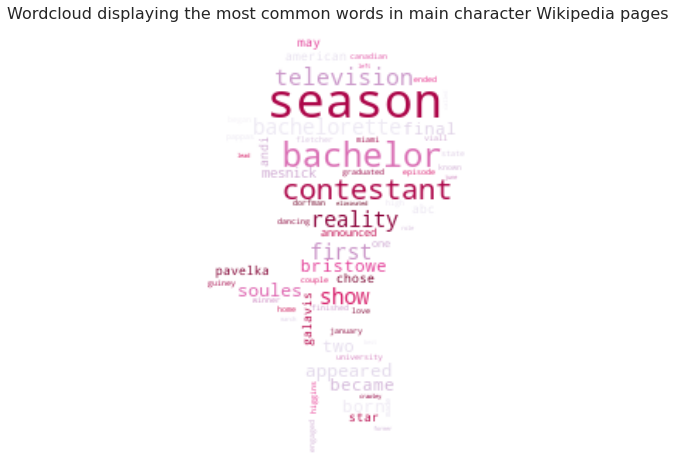

In [71]:
wiki_string = ""
for word in fdist:
    wiki_string += (word + " ")*round(fdist[word])
    

show_wordcloud(wiki_string,"Wordcloud displaying the most common words in main character Wikipedia pages", "PuRd_r")

We can mostly see words relating to the show like "bachelor", "season", "contestant". 
We can also see words related to a persons demographics like "born", "university", "american".

The wordcloud gives predictable results showing mostly words that are related to the franchise and then
words relating to demographics which is fitting in an "about" page for a contestant.

## Conclusion

Overall the assignment went well. All criteria that the group wanted to focus on was executed and the group worked well together. 

The results from the sentiment analysis and the wordclouds were affected by the quality of the data. Even though we managed
to get a text for a big part of the contestants, the texts were both short and not very detailed and in many cases only included standard things like 
in which season they appeared and in what week they were eliminated.  

By comparing our network to a random network, it can be seen that it has a similar average degree but in a much bigger range than the
the random network. Even though the team wanted to disprove the Friendship paradox, that had been stuck in our mind since it was introduced in the course, it was not possible. 
On average, your friends have more friends than you do... and the same applies to our network. 

The network visualization showed that the season's group together and some hubs appear, that represent the contestants
that have most often participated in any of the franchise's shows.

The community detections show that there is not much difference in the communities's sentiment and our network split 
to 14 communities so there is not just one community for each series. Most of the communities have contestants that 
have just participated in one series, and that is also the most common situation. 

In general, the data quality could be augmented and it would be nice to have data from all the series. 
However, we expect that even though all series would be included the analysis would not change that much.


## References

Albert László Barabási. (2016). **Network Science**. Received from: http://networksciencebook.com/

Steven Bird, Ewan Klein, and Edward Loper. (2009). **Natural Language Processing with Python**. Received from: 
http://www.nltk.org/book/

Sune Lehmann Jørgensen. (2020). **02805 Social graphs and interactions E20** - All lectures and notebooks

Thomas Aynaud. (2009). **Community detection for NetworkX’s documentation**. Received from: 
https://perso.crans.org/aynaud/communities/



